<a href="https://colab.research.google.com/github/marcinwizgird/DATAENLIGHT_AI_NLP/blob/main/Llama_LayerSkip_Explainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [2]:
%pip install transformer_lens
%pip install circuitsvis

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.8 MB/s eta 0:00:00
  Created wheel for transformers-stream-generator: filename=transformers_stream_generator-0.0.5-py3-none-any.whl size=12426 sha256=a7d14449a467f32e73f0a10a718be84f8d1d71a0fd43a05baf63f69eb283c4a1
  Stored in directory: /root/.cache/pip/wheels/23/e8/f0/b3c58c12d1ffe60bcc8c7d121115f26b2c1878653edfca48db
Successfully

In [3]:
#Importing Deep Learning Librariers
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from copy import deepcopy

#Importing ML and Visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import transformer_lens librariers
import transformer_lens.utils as utils
from transformer_lens.hook_points import (
    HookPoint,
)  # Hooking utilities
from transformer_lens import HookedTransformer, FactoredMatrix

import circuitsvis as cv
# Testing that the library works
cv.examples.hello("Neel")

Validating the differences between Llama 2 Base and Llama LayerSkip architecture

In [5]:
#pip install transformers torch accelerate sentencepiece

In [6]:
#Uploading llama-2-7B
#model_id = "facebook/layerskip-llama2-7B"
model_id = "facebook/layerskip-llama3.2-1B"

In [7]:
from google.colab import userdata
hf_token = userdata.get('HF_TOKEN_DATAENLIGHT')

In [8]:

# Example: Get token from environment variable
# hf_token = os.getenv("HUGGINGFACE_TOKEN")
# Example: Directly paste token (use with caution)
# hf_token = "hf_YOUR_ACCESS_TOKEN_HERE" # Replace with your actual token

# Check if a token is provided (useful if not using CLI login consistently)
if hf_token is None and 'HUGGINGFACE_TOKEN' in os.environ:
    hf_token = os.getenv("HUGGINGFACE_TOKEN")
    print("Using Hugging Face token from environment variable.")
elif hf_token:
     print("Using Hugging Face token provided directly in the script.")
else:
    print("Attempting to load model without explicit token (relies on CLI login or cached credentials).")
    # Set token to True to explicitly use cached token if available after CLI login
    # hf_token = True # Or None if you want to rely purely on implicit discovery

# --- Loading Tokenizer ---
print(f"Loading tokenizer for model: {model_id}")
try:
    # Load the tokenizer associated with the Llama-2-7b model
    tokenizer = AutoTokenizer.from_pretrained(
        model_id,
        token=hf_token # Pass token if using Method 2 or explicitly using cached token
    )
    print("Tokenizer loaded successfully.")
except Exception as e:
    print(f"Error loading tokenizer: {e}")
    print("Please ensure you have requested and been granted access to the model on Hugging Face:")
    print(f"https://huggingface.co/{model_id}")
    print("And that you are properly authenticated (e.g., via `huggingface-cli login`).")
    exit() # Exit if tokenizer fails, as model loading will also fail

# --- Loading Model ---
print(f"Loading model: {model_id}")
print("This may take a while and require significant RAM/VRAM...")

try:
    # Load the model
    # device_map='auto' uses Accelerate to automatically distribute layers across GPU(s) and CPU RAM
    # torch_dtype=torch.float16 uses half-precision for less memory usage (requires compatible GPU)
    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        token=hf_token,               # Pass token if needed
        torch_dtype=torch.float16,    # Use float16 to save memory (requires GPU)
                                      # Use torch.bfloat16 for Ampere+ GPUs for better balance
                                      # Omit or use torch.float32 for CPU or if float16 causes issues
        device_map="auto",            # Automatically map layers to available devices (GPU/CPU)
                                      # Requires 'accelerate' library
                                      # Use device_map='cuda:0' to force to a specific GPU
                                      # Omit device_map to load entirely on CPU (requires LOTS of RAM)
        # trust_remote_code=True      # Sometimes needed for specific model implementations,
                                      # but generally try without it first for official models like Llama.
                                      # Only set to True if you trust the source code.
    )
    print("Model loaded successfully.")
    print(f"Model device map: {model.hf_device_map}") # Show how the model is distributed

except Exception as e:
    print(f"Error loading model: {e}")
    print("Potential reasons:")
    print("- Ensure you have enough RAM (CPU loading) or VRAM (GPU loading). Llama-7B needs ~14GB for float16.")
    print("- Double-check authentication and model access permissions.")
    print("- Ensure 'accelerate' is installed if using device_map='auto'.")
    exit()

Using Hugging Face token provided directly in the script.
Loading tokenizer for model: facebook/layerskip-llama3.2-1B


tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

Tokenizer loaded successfully.
Loading model: facebook/layerskip-llama3.2-1B
This may take a while and require significant RAM/VRAM...


config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/126 [00:00<?, ?B/s]

Model loaded successfully.
Model device map: {'': 0}


In [9]:
skipLayerModel = model
print(skipLayerModel)

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 2048)
    (layers): ModuleList(
      (0-15): 16 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=512, bias=False)
          (v_proj): Linear(in_features=2048, out_features=512, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (up_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (down_proj): Linear(in_features=8192, out_features=2048, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((2048,), eps=1e-05)
    (rotary_emb):

#Defining Assistant model for Drafting Phase of Speculative Decoding
(Method 1 - Direct Engineering)

In [10]:
def deriveAssistantModel(model : torch.nn.Module, earlyExitLayer : int):
    generationConfig = model.generation_config
    weightsMemory = {id(w): w for w in model.parameters()}
    #clone main model with shared weights
    assistantModel = deepcopy(model, memo = weightsMemory)
    # Apply early exit determined by hyperparameter
    assistantModel.model.layers = assistantModel.model.layers[:earlyExitLayer]
    del assistantModel.model.layers[earlyExitLayer:]
    assistantModel.generation_config = generationConfig
    return assistantModel


In [11]:
earlyExitLayer = 16
device = utils.get_device()
device

device(type='cuda')

In [12]:
torch.cuda.is_available()

True

In [13]:
skipLayerModel.to(device)
derivedAssistantModel = deriveAssistantModel(skipLayerModel, earlyExitLayer)
derivedAssistantModel.to(device)
del skipLayerModel

In [14]:
print(derivedAssistantModel)

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 2048)
    (layers): ModuleList(
      (0-15): 16 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=512, bias=False)
          (v_proj): Linear(in_features=2048, out_features=512, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (up_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (down_proj): Linear(in_features=8192, out_features=2048, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((2048,), eps=1e-05)
    (rotary_emb):

In [15]:
derivedAssistantModel.generation_config

GenerationConfig {
  "bos_token_id": 128000,
  "eos_token_id": 128001
}

In [16]:
derivedAssistantModel.config

LlamaConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": 128001,
  "head_dim": 64,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 16,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "high_freq_factor": 4.0,
    "low_freq_factor": 1.0,
    "original_max_position_embeddings": 8192,
    "rope_type": "llama3"
  },
  "rope_theta": 500000.0,
  "tie_word_embeddings": true,
  "torch_dtype": "float16",
  "transformers_version": "4.51.3",
  "use_cache": true,
  "vocab_size": 128256
}

In [17]:
del derivedAssistantModel

In [18]:
from transformers import AutoConfig, AutoModelForCausalLM

config = AutoConfig.from_pretrained(model_id, token=hf_token)
original_num_layers = config.num_hidden_layers
new_num_layers = earlyExitLayer
config.num_hidden_layers = new_num_layers
print(f"Modified config to have {new_num_layers} layers.")

# Attempt to load model with modified config and PRE-TRAINED weights
try:
    print("Attempting to load pre-trained weights with modified config...")
    # This will likely FAIL or WARN loudly about mismatched weights!
    model_modified = AutoModelForCausalLM.from_pretrained(
        model_id,
        config=config, # Pass the modified config
        token=hf_token,
        # Add quantization, device_map etc. as needed
        device_map="auto",
        # You might need ignore_mismatched_sizes=True for it to even load *something*
        # ignore_mismatched_sizes=True
    )
    print("Model loaded with modified config (check warnings!).")
except Exception as e:
    print(f"\nERROR loading model with modified config: {e}")
    print("This usually happens because the pre-trained checkpoint weights")
    print(f"are for {original_num_layers} layers, not {new_num_layers}.")

Modified config to have 16 layers.
Attempting to load pre-trained weights with modified config...
Model loaded with modified config (check warnings!).


In [19]:
model_modified.config

LlamaConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": 128001,
  "head_dim": 64,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 16,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "high_freq_factor": 4.0,
    "low_freq_factor": 1.0,
    "original_max_position_embeddings": 8192,
    "rope_type": "llama3"
  },
  "rope_theta": 500000.0,
  "tie_word_embeddings": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3",
  "use_cache": true,
  "vocab_size": 128256
}

In [20]:
assitantModel = model_modified

In [21]:
assitantModel.config

LlamaConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": 128001,
  "head_dim": 64,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 16,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "high_freq_factor": 4.0,
    "low_freq_factor": 1.0,
    "original_max_position_embeddings": 8192,
    "rope_type": "llama3"
  },
  "rope_theta": 500000.0,
  "tie_word_embeddings": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3",
  "use_cache": true,
  "vocab_size": 128256
}

Defining HookedTransfromer from TransformerLens for SkipLayer Llama and derived Assistant Model

In [22]:
torch.set_grad_enabled(False)

In [23]:
assitantModel.device
device

device(type='cuda')

In [24]:
llama_model_name = "meta-llama/Llama-3.2-1B"
model = HookedTransformer.from_pretrained(llama_model_name, hf_model = assitantModel, device=device, hf_token = hf_token, first_n_layers = earlyExitLayer)

tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

Loaded pretrained model meta-llama/Llama-3.2-1B into HookedTransformer


In [25]:
model_description_text = """## Loading Models

HookedTransformer comes loaded with >40 open source GPT-style models. You can load any of them in with `HookedTransformer.from_pretrained(MODEL_NAME)`. See my explainer for documentation of all supported models, and this table for hyper-parameters and the name used to load them. Each model is loaded into the consistent HookedTransformer architecture, designed to be clean, consistent and interpretability-friendly.

For this demo notebook we'll look at GPT-2 Small, an 80M parameter model. To try the model the model out, let's find the loss on this paragraph!"""
loss = model(model_description_text, return_type="loss")
print("Model loss:", loss)

Model loss: tensor(3.4780, device='cuda:0')


In [26]:
model.generate(model_description_text)

  0%|          | 0/10 [00:00<?, ?it/s]

"## Loading Models\n\nHookedTransformer comes loaded with >40 open source GPT-style models. You can load any of them in with `HookedTransformer.from_pretrained(MODEL_NAME)`. See my explainer for documentation of all supported models, and this table for hyper-parameters and the name used to load them. Each model is loaded into the consistent HookedTransformer architecture, designed to be clean, consistent and interpretability-friendly.\n\nFor this demo notebook we'll look at GPT-2 Small, an 80M parameter model. To try the model the model out, let's find the loss on this paragraph! We'll save that to out_loss later. \n\n"

Direct Logit Attribution


#Direct Logit Attribution Experiment Implementation

In [27]:
#Configuration
sampleSentence = "The capital city of France is"

In [28]:
tokens = model.to_tokens(sampleSentence, prepend_bos = True).to(device)

In [29]:
tokens

tensor([[128000,    791,   6864,   3363,    315,   9822,    374]],
       device='cuda:0')

In [30]:
out = model(tokens)
torch.argmax(out, axis = -1)

tensor([[    2,   220,   315,   315,   279,    11, 12366]], device='cuda:0')

In [31]:
original_logits, cache = model.run_with_cache(tokens)

In [32]:
cache

ActivationCache with keys ['hook_embed', 'blocks.0.hook_resid_pre', 'blocks.0.ln1.hook_scale', 'blocks.0.ln1.hook_normalized', 'blocks.0.attn.hook_q', 'blocks.0.attn.hook_k', 'blocks.0.attn.hook_v', 'blocks.0.attn.hook_rot_q', 'blocks.0.attn.hook_rot_k', 'blocks.0.attn.hook_attn_scores', 'blocks.0.attn.hook_pattern', 'blocks.0.attn.hook_z', 'blocks.0.hook_attn_out', 'blocks.0.hook_resid_mid', 'blocks.0.ln2.hook_scale', 'blocks.0.ln2.hook_normalized', 'blocks.0.mlp.hook_pre', 'blocks.0.mlp.hook_pre_linear', 'blocks.0.mlp.hook_post', 'blocks.0.hook_mlp_out', 'blocks.0.hook_resid_post', 'blocks.1.hook_resid_pre', 'blocks.1.ln1.hook_scale', 'blocks.1.ln1.hook_normalized', 'blocks.1.attn.hook_q', 'blocks.1.attn.hook_k', 'blocks.1.attn.hook_v', 'blocks.1.attn.hook_rot_q', 'blocks.1.attn.hook_rot_k', 'blocks.1.attn.hook_attn_scores', 'blocks.1.attn.hook_pattern', 'blocks.1.attn.hook_z', 'blocks.1.hook_attn_out', 'blocks.1.hook_resid_mid', 'blocks.1.ln2.hook_scale', 'blocks.1.ln2.hook_normaliz

In [33]:
original_logits.shape

torch.Size([1, 7, 128256])

In [34]:
model.generate(sampleSentence)

  0%|          | 0/10 [00:00<?, ?it/s]

'The capital city of France is a modest stop for anyone taking a trip to the'

In [35]:
model.generate("What is the capital city of France?")

  0%|          | 0/10 [00:00<?, ?it/s]

'What is the capital city of France? in Plucky Sayings\nList of all popular'

In [36]:
class TransformerExperiment:
   def __init__(self, model_id) -> None:
       self.model_id = model_id
       self.model = None
       self.tokenizer = None
       self.logit_contributions_per_layer = []



   def deriveAssistantModel(model : torch.nn.Module, earlyExitLayer : int, deallocateSrcModelFlag : bool = False):
        generationConfig = model.generation_config
        weightsMemory = {id(w): w for w in model.parameters()}
        assistantModel = deepcopy(model, memo = weightsMemory) # Clone main model with shared weights
        assistantModel.model.layers = assistantModel.model.layers[:earlyExitLayer] # Apply early exit
        del assistantModel.model.layers[earlyExitLayer:]
        assistantModel.generation_config = generationConfig
        return assistantModel

   def setModel(self, model : torch.nn.Module):
       self.model = model

   def get_layer_logit_contributions(model: HookedTransformer, input_tokens: torch.Tensor, final_predicted_token_id: int):
      """
      Calculates the direct logit contribution of each layer to the logits of the
      token predicted in the final layer.

      Args:
          model: The HookedTransformer model.
          input_tokens: The input tokens (shape: [batch, seq_len]).
          final_predicted_token_id: The ID of the token predicted by the final layer.

      Returns:
          A dictionary where keys are layer indices and values are the logit contribution
          of that layer to the final predicted token.
      """
      layer_contributions = {}

      def hook_fn(hook, layern):
          layer_output = hook.output

          if 'mlp' in hook.name:
              layer_logits = model.unembed(layer_output)
          elif 'attn' in hook.name:
              layer_logits = model.unembed(layer_output)
          else:
              return

          # Contribution to the logits of the final predicted token
          contribution = layer_logits[0, -1, final_predicted_token_id].item()
          return contribution

      for layer_idx in range(model.cfg.n_layers):
          hook_name_attn = f"blocks.{layer_idx}.attn.hook_result"
          hook_name_mlp = f"blocks.{layer_idx}.mlp.hook_post"

          # Capture contribution from attention output
          attn_contribution = model.run_hook(input_tokens, hook_name_attn, hook_fn, layern=layer_idx)
          if attn_contribution is not None:
              layer_contributions[f"layer_{layer_idx}_attn"] = attn_contribution

          # Capture contribution from MLP output
          mlp_contribution = model.run_hook(input_tokens, hook_name_mlp, hook_fn, layern=layer_idx)
          if mlp_contribution is not None:
             layer_contributions[f"layer_{layer_idx}_mlp"] = mlp_contribution

          return layer_contributions

Loaded pretrained model meta-llama/Llama-3.2-1B into HookedTransformer
Moving model to device:  cuda
Input: <|begin_of_text|>The capital of France is
Final Predicted Token:  Paris

Log Probability of the Final Predicted Token at Each Layer:
                  0
layer_0  -11.425403
layer_1  -11.288629
layer_2  -11.061173
layer_3  -10.225573
layer_4   -9.544531
layer_5   -9.623109
layer_6   -9.212948
layer_7   -8.767255
layer_8   -7.833096
layer_9   -6.736149
layer_10  -5.178202
layer_11  -3.120447
layer_12  -1.852006
layer_13  -1.252159
layer_14  -1.211358
layer_15  -0.959855

Log Probability Increase of the Final Predicted Token at Each Layer (vs. Previous Layer/Embedding):
                  0
layer_0    0.000000
layer_1    0.136774
layer_2    0.227455
layer_3    0.835601
layer_4    0.681042
layer_5   -0.078578
layer_6    0.410161
layer_7    0.445693
layer_8    0.934159
layer_9    1.096947
layer_10   1.557948
layer_11   2.057754
layer_12   1.268441
layer_13   0.599848
layer_14   0.04080

<Figure size 1000x600 with 0 Axes>

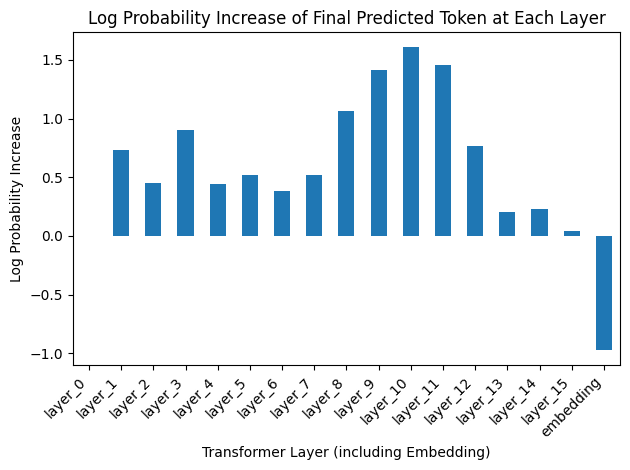

In [37]:
import torch
from transformer_lens import HookedTransformer
from torch.nn.functional import log_softmax
import pandas as pd

# Configuration (same as before)
MODEL_NAME = llama_model_name  # Replace with the correct Llama-3.2-1B identifier if available
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
INPUT_TEXT = "The capital of France is"
MAX_NEW_TOKENS = 10

try:
    model = HookedTransformer.from_pretrained(MODEL_NAME, hf_model = model_modified).to(DEVICE)
except Exception as e:
    print(f"Error loading model {MODEL_NAME}: {e}")
    exit()

tokenizer = model.tokenizer
tokens = tokenizer.encode(INPUT_TEXT, return_tensors="pt").to(DEVICE)

def calculate_log_prob_increase(model: HookedTransformer, input_tokens: torch.Tensor):
    """
    Calculates the log probability of the final predicted token at the output
    of each layer and the increase compared to the previous layer.
    """
    logits, cache = model.run_with_cache(input_tokens)
    final_predicted_token_id = torch.argmax(logits[0, -1, :]).item()

    layer_log_probs = {}
    log_prob_increases = {}
    previous_log_prob = None

    for layer_idx in range(model.cfg.n_layers):
        hook_name = f"blocks.{layer_idx}.hook_resid_post"
        layer_output = cache[hook_name]
        layer_logits = model.unembed(layer_output)
        current_log_prob = log_softmax(layer_logits[0, -1, :], dim=-1)[final_predicted_token_id].item()
        layer_log_probs[f"layer_{layer_idx}"] = current_log_prob

        if previous_log_prob is not None:
            increase = current_log_prob - previous_log_prob
            log_prob_increases[f"layer_{layer_idx}"] = increase
        else:
            log_prob_increases[f"layer_{layer_idx}"] = 0.0  # No increase for the first layer

        previous_log_prob = current_log_prob

    # Calculate increase from embedding layer (approximation)
    embed_output = cache['hook_embed'] # + cache['pos_embed']
    embed_logits = model.unembed(embed_output)
    embed_log_prob = log_softmax(embed_logits[0, -1, :], dim=-1)[final_predicted_token_id].item()
    log_prob_increases['embedding'] = layer_log_probs['layer_0'] - embed_log_prob

    return layer_log_probs, log_prob_increases

# Generate and analyze
for step in range(MAX_NEW_TOKENS): # For simplicity, just analyze the first prediction
    logits, cache = model.run_with_cache(tokens, remove_batch_dim=True)
    final_predicted_token_id = torch.argmax(logits[:, -1, :], dim=-1).item()
    print("Input:", tokenizer.decode(tokens[0]))
    print("Final Predicted Token:", tokenizer.decode([final_predicted_token_id]))

    layer_log_probs, log_prob_increases = calculate_log_prob_increase(model, tokens)

    df_log_probs = pd.DataFrame([layer_log_probs])
    print("\nLog Probability of the Final Predicted Token at Each Layer:")
    print(df_log_probs.T)

    df_increases = pd.DataFrame([log_prob_increases])
    print("\nLog Probability Increase of the Final Predicted Token at Each Layer (vs. Previous Layer/Embedding):")
    print(df_increases.T)

    tokens = torch.cat((tokens, torch.tensor([[final_predicted_token_id]]).to(DEVICE)), dim=-1)

# Optional Visualization
import matplotlib.pyplot as plt
import seaborn as sns

if 'df_increases' in locals() and not df_increases.empty:
    plt.figure(figsize=(10, 6))
    df_increases.T.plot(kind='bar', legend=False)
    plt.title('Log Probability Increase of Final Predicted Token at Each Layer')
    plt.xlabel('Transformer Layer (including Embedding)')
    plt.ylabel('Log Probability Increase')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [45]:
import torch
from transformer_lens import HookedTransformer
from torch.nn.functional import log_softmax
import pandas as pd
from copy import deepcopy
import os
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Added for cumulative sum

class TransformerExperiment:
    """
    A class to experiment with Transformer models using TransformerLens,
    focusing on analyzing the log probability contributions of different
    model components (embedding, attention blocks, MLP blocks) to the
    predicted token.
    """
    def __init__(self, modelId: str, hfToken: str = None, preloadedModelId: str = None) -> None:
        """
        Initializes the experiment by loading the specified model and tokenizer.

        Args:
            modelId (str): The Hugging Face model ID to load with TransformerLens (e.g., "gpt2", "EleutherAI/pythia-70m").
                           This model will be used for the analysis.
            hfToken (str, optional): Hugging Face API token. If None, attempts to use
                                     the HUGGINGFACE_TOKEN environment variable or relies on
                                     CLI login/cached credentials. Defaults to None.
            preloadedModelId (str, optional): If specified, preloads this model ID using the standard
                                              Hugging Face Transformers library first. This is useful
                                              for models not directly supported by TransformerLens'
                                              from_pretrained or requiring specific configurations
                                              (like gated models such as Llama). The preloaded
                                              hf_model is then passed to HookedTransformer.
                                              Defaults to None.
        """
        self.modelId = modelId
        self.model: HookedTransformer = None
        self.tokenizer: AutoTokenizer = None
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"Using device: {self.device}")
        self.logitContributionsPerToken: list[dict[int, float]] = [] # Stores contributions for individual predictions
        self.llmModel: AutoModelForCausalLM = None # Stores the preloaded HF model if used

        # --- Token Handling ---
        if hfToken is None and 'HUGGINGFACE_TOKEN' in os.environ:
            hfToken = os.getenv("HUGGINGFACE_TOKEN")
            print("Using Hugging Face token from environment variable.")
        elif hfToken:
            print("Using Hugging Face token provided directly.")
        else:
            print("Attempting to load model without explicit token (relies on CLI login or cached credentials).")
            # Set token to None explicitly if not found, for clarity in from_pretrained calls
            hfToken = None

        # --- Model Loading ---
        if preloadedModelId:
            self._preloadLlm(preloadedModelId, hfToken)
            try:
                print(f"Loading HookedTransformer wrapping preloaded model: {preloadedModelId}")
                # Pass the token here as well, TransformerLens might need it for config etc.
                self.model = HookedTransformer.from_pretrained(
                    modelId, # Use the ID TransformerLens expects, even if wrapping
                    hf_model=self.llmModel,
                    device=self.device, # Explicitly set device
                    fold_ln=False, # Often needed for accurate cache usage with HF models
                    fold_value_biases=False,
                    center_writing_weights=False,
                    center_unembed=False,
                    tokenizer=self.tokenizer, # Pass preloaded tokenizer
                    # token=hfToken # Pass token if needed by TLens' internal logic for this model ID
                ).to(self.device) # Ensure final model is on correct device
                # self.tokenizer is already set during _preloadLlm
                print("HookedTransformer loaded successfully wrapping preloaded model.")
            except Exception as e:
                print(f"Error loading HookedTransformer from preloaded model {preloadedModelId}: {e}")
                print("Falling back to default loading mechanism for modelId:", self.modelId)
                self._loadModel(hfToken) # Fallback to default loading using self.modelId
        else:
            self._loadModel(hfToken)

        # Final check
        if self.model is None or self.tokenizer is None:
             raise RuntimeError("Failed to load model and tokenizer.")
        print(f"Model '{self.model.cfg.model_name}' loaded with {self.model.cfg.n_layers} layers.")


    def _loadModel(self, hfToken: str):
        """Loads the model directly using HookedTransformer.from_pretrained."""
        print(f"Loading model '{self.modelId}' directly with TransformerLens...")
        try:
            # Explicitly pass device and token
            self.model = HookedTransformer.from_pretrained(
                self.modelId,
                device=self.device,
                token=hfToken
            ).to(self.device) # Ensure it's on the correct device
            self.tokenizer = self.model.tokenizer # Get tokenizer from HookedTransformer
            print(f"Model '{self.modelId}' loaded successfully via TransformerLens.")
        except Exception as e:
            print(f"Error loading model {self.modelId} directly with TransformerLens: {e}")
            print("Check model name, internet connection, and HF credentials/access.")
            raise

    def _preloadLlm(self, preloadedModelId: str, hfToken: str):
        """Preloads the LLM using Hugging Face's AutoModelForCausalLM."""
        print(f"--- Pre-loading Hugging Face Model: {preloadedModelId} ---")
        print(f"Pre-loading tokenizer for model: {preloadedModelId}")
        try:
            self.tokenizer = AutoTokenizer.from_pretrained(preloadedModelId, token=hfToken)
            print("Tokenizer pre-loaded successfully.")
        except Exception as e:
            print(f"Error pre-loading tokenizer: {e}")
            print(f"Please ensure you have requested and been granted access to the model on Hugging Face: https://huggingface.co/{preloadedModelId}")
            print("And that you are properly authenticated (e.g., via `huggingface-cli login` or providing a token).")
            exit(1) # Exit if tokenizer fails, as model loading will likely fail too

        print(f"Pre-loading model: {preloadedModelId}")
        print("This may take a while and require significant RAM/VRAM...")

        try:
            # Use device_map="auto" for efficient loading across devices if available
            # Requires 'accelerate' library: pip install accelerate
            self.llmModel = AutoModelForCausalLM.from_pretrained(
                preloadedModelId,
                token=hfToken,
                torch_dtype=torch.float16, # Use float16 to save memory
                device_map="auto", # Automatically distribute layers across CPU/GPU(s)
            )
            print("Model pre-loaded successfully using Transformers library.")
            # Note: self.device will be the primary device, but model might be split.
            # HookedTransformer handles this when wrapping the hf_model.
            print(f"Model device map: {self.llmModel.hf_device_map}")

        except Exception as e:
            print(f"Error pre-loading model with Transformers: {e}")
            print("\nPotential reasons & solutions:")
            print("- Ensure 'accelerate' is installed (`pip install accelerate`).")
            print("- Ensure you have enough RAM (CPU loading) or VRAM (GPU loading). Llama-7B needs ~14GB for float16.")
            print("- Double-check authentication (token/login) and model access permissions on Hugging Face.")
            print("- Check for typos in the model ID.")
            exit(1) # Exit if model pre-loading fails

    @staticmethod
    def deriveAssistantModel(model : HookedTransformer, earlyExitLayer : int):
        """
        Creates a new HookedTransformer instance that is a shallow copy of the
        original but truncates the layers at the specified earlyExitLayer.
        Weights are shared initially, but gradients won't flow back to the original.

        Args:
            model (HookedTransformer): The source model.
            earlyExitLayer (int): The layer index (0-based) *after* which to truncate.
                                   The assistant model will have layers 0 to earlyExitLayer-1.

        Returns:
            HookedTransformer: A new model instance with truncated layers.
        """
        if not (0 < earlyExitLayer <= model.cfg.n_layers):
            raise ValueError(f"earlyExitLayer must be between 1 and {model.cfg.n_layers}")

        print(f"Deriving assistant model exiting AFTER layer {earlyExitLayer - 1}")
        # Create a shallow copy of the config and modify it
        new_cfg = deepcopy(model.cfg)
        new_cfg.n_layers = earlyExitLayer

        # Create a new HookedTransformer with the modified config
        # This avoids deepcopying the entire model structure unnecessarily
        assistantModel = HookedTransformer(new_cfg)

        # Copy weights/buffers from the original model to the new truncated model
        # This ensures parameters are shared where layers overlap
        original_state_dict = model.state_dict()
        assistant_state_dict = assistantModel.state_dict()

        # Filter original state dict to only include keys present in the assistant model
        filtered_state_dict = {
            k: v for k, v in original_state_dict.items() if k in assistant_state_dict
        }

        # Load the filtered state dict
        assistantModel.load_state_dict(filtered_state_dict, strict=False) # strict=False allows missing keys (the truncated layers)

        # Ensure the new model is on the same device as the original
        assistantModel = assistantModel.to(model.cfg.device)
        assistantModel.eval() # Set to evaluation mode

        print(f"Assistant model created with {assistantModel.cfg.n_layers} layers.")
        return assistantModel


    def setModel(self, model : HookedTransformer):
        """
        Allows replacing the model and tokenizer used by the experiment instance.
        Useful for analyzing a derived model (e.g., early exit).

        Args:
            model (HookedTransformer): The new HookedTransformer model to use.
        """
        print(f"Setting experiment model to: {model.cfg.model_name} ({model.cfg.n_layers} layers)")
        self.model = model
        # Assume the new model comes with its own tokenizer or reuse if compatible
        if hasattr(model, 'tokenizer') and model.tokenizer:
            self.tokenizer = model.tokenizer
        else:
            print("Warning: New model does not have a tokenizer attached. Reusing the previous one.")
            if self.tokenizer is None:
                 raise ValueError("Cannot set model without tokenizer if no tokenizer was previously loaded.")
        self.modelId = model.cfg.model_name # Update modelId reference


    def calculateLogProbContributionPerToken(self, inputText: str, maxNewTokens: int = 1) -> list[dict[int, float]]:
        """
        Calculates the log probability contribution of each model component (embedding,
        attention blocks, MLP blocks) for each token generated.

        Args:
            inputText (str): The input prompt.
            maxNewTokens (int): The number of tokens to generate and analyze. Defaults to 1.

        Returns:
            list[dict[int, float]]: A list where each element corresponds to a generated token.
                                     Each dictionary maps a sub-layer index to its log probability
                                     contribution for the *actually predicted* token at that step.
                                     Index 0: Embedding contribution.
                                     Index 1: Layer 0 Attention contribution.
                                     Index 2: Layer 0 MLP contribution.
                                     Index 3: Layer 1 Attention contribution.
                                     ... and so on.
        """
        if not self.model or not self.tokenizer:
            print("Error: Model or tokenizer not loaded.")
            return []

        tokens = self.tokenizer.encode(inputText, return_tensors="pt").to(self.device)
        generatedTokens = tokens.clone()
        allStepsContributions: list[dict[int, float]] = []

        self.model.eval() # Ensure model is in eval mode
        with torch.no_grad(): # Disable gradients for inference
            for step in range(maxNewTokens):
                # Get logits and activations for the current sequence
                logits, cache = self.model.run_with_cache(generatedTokens, remove_batch_dim=True) # remove_batch_dim=True simplifies indexing

                # Get the ID of the token predicted for the *next* position
                # Logits shape: [seq_len, d_vocab]
                finalPredictedTokenId: int = torch.argmax(logits[-1, :]).item() # Logits for the last token position

                # --- Calculate Log Probability Contributions ---
                # We calculate the log_softmax of the output of each component *projected to the vocab space*,
                # and take the value corresponding to the final predicted token ID.
                currentStepContributions: dict[int, float] = {}
                subLayerCounter = 1 # Start from 1 for layer blocks

                # Embedding Contribution (applied to the residual stream *before* layer 0)
                # Note: TransformerLens cache['hook_embed'] and cache['hook_pos_embed'] contain the embeddings themselves.
                # The contribution comes from the initial state passed into the first layer's normalization.
                # We often approximate this by looking at the residual stream *before* any blocks.
                # Let's use cache["blocks.0.hook_resid_pre"] which is the state input to layer 0.
                # If the model doesn't have pre-LN norm, use 'hook_embed' + 'hook_pos_embed' or just 'hook_resid_pre' if available at layer 0.

                # Use residual stream state *before* Layer 0 as the "initial" state
                if "blocks.0.hook_resid_pre" in cache:
                    initial_resid = cache["blocks.0.hook_resid_pre"] # Shape [seq_len, d_model]
                elif "ln_final.hook_normalized" in cache:
                    # If no resid_pre, maybe infer based on final norm input if absolutely necessary (less ideal)
                    # This is complex, let's stick to the documented direct contributions if possible.
                    # A simpler approximation: Use the embedding layer output directly.
                    # This ignores positional encoding's direct effect but captures token embedding.
                    embed_output = cache['hook_embed'] # Output of token embedding lookup
                    if 'hook_pos_embed' in cache:
                        embed_output += cache['hook_pos_embed'] # Add positional embedding if separate
                    initial_resid = embed_output # Approximate initial state
                else:
                     print("Warning: Could not find 'blocks.0.hook_resid_pre' or 'hook_embed' in cache. Skipping embedding contribution.")
                     initial_resid = None

                if initial_resid is not None:
                    # Unembed the state *at the last sequence position*
                    embedLogits = self.model.unembed(self.model.ln_final(initial_resid[-1, :])) # Apply final LayerNorm + Unembed
                    embedLogProb: float = log_softmax(embedLogits, dim=-1)[finalPredictedTokenId].item()
                    currentStepContributions[0] = embedLogProb # Use 0 for "embedding"/initial state

                # Layer Contributions (Attention and MLP blocks)
                for layerIdx in range(self.model.cfg.n_layers):
                    # Attention Residual Block Contribution
                    # hook_attn_out is the output of the attention block *added* to the residual stream input
                    # We want the *direct* output of the attention block *before* the addition.
                    # TransformerLens provides specific hooks for this: `hook_z` (output of attention heads after W_O)
                    if f"blocks.{layerIdx}.attn.hook_z" in cache:
                        attnOut = cache[f"blocks.{layerIdx}.attn.hook_z"] # Shape [seq_len, num_heads, d_head] -> effectively [seq_len, d_model] after W_O
                        # Unembed the output *at the last sequence position* after applying final LayerNorm
                        # Apply final LN to simulate its effect if this output were the final state
                        attnLogits = self.model.unembed(self.model.ln_final(attnOut[-1, :]))
                        attnLogProb: float = log_softmax(attnLogits, dim=-1)[finalPredictedTokenId].item()
                        currentStepContributions[subLayerCounter] = attnLogProb
                    else:
                        print(f"Warning: Cache key 'blocks.{layerIdx}.attn.hook_z' not found. Skipping Attn L{layerIdx} contribution.")
                        currentStepContributions[subLayerCounter] = 0.0 # Or float('nan')
                    subLayerCounter += 1

                    # MLP Residual Block Contribution
                    # hook_mlp_out is the output of the MLP block *added* to the residual stream input.
                    # We want the direct output before addition. `hook_post` inside the MLP block usually captures this.
                    if f"blocks.{layerIdx}.mlp.hook_post" in cache:
                        mlpOut = cache[f"blocks.{layerIdx}.mlp.hook_post"] # Shape [seq_len, d_model]
                        # Unembed the output *at the last sequence position* after applying final LayerNorm
                        mlpLogits = self.model.unembed(self.model.ln_final(mlpOut[-1, :]))
                        mlpLogProb: float = log_softmax(mlpLogits, dim=-1)[finalPredictedTokenId].item()
                        currentStepContributions[subLayerCounter] = mlpLogProb
                    else:
                         print(f"Warning: Cache key 'blocks.{layerIdx}.mlp.hook_post' not found. Skipping MLP L{layerIdx} contribution.")
                         currentStepContributions[subLayerCounter] = 0.0 # Or float('nan')
                    subLayerCounter += 1


                allStepsContributions.append(currentStepContributions)

                # Add the predicted token to the sequence for the next step
                generatedTokens = torch.cat(
                    (generatedTokens, torch.tensor([[finalPredictedTokenId]], device=self.device)),
                    dim=-1
                )

        self.logitContributionsPerToken.extend(allStepsContributions) # Store if needed later
        return allStepsContributions

    def computeAverageLogitContributionPerToken(self, prompts: list[str], maxNewTokens: int = 1) -> pd.DataFrame:
        """
        Computes the average log probability contribution per sub-layer across multiple prompts
        and potentially multiple generated tokens per prompt.

        Args:
            prompts (list[str]): A list of input prompts.
            maxNewTokens (int): The number of tokens to generate and analyze for *each* prompt. Defaults to 1.

        Returns:
            pd.DataFrame: A DataFrame containing the average log probability contribution
                          for each sub-layer index across all analyzed tokens. Returns an empty
                          DataFrame if no contributions were calculated.
        """
        allPromptsContributions: list[dict[int, float]] = []
        total_tokens_analyzed = 0

        for prompt in prompts:
            print(f"\nProcessing prompt: '{prompt}'")
            contributions = self.calculateLogProbContributionPerToken(prompt, maxNewTokens)
            if contributions:
                 allPromptsContributions.extend(contributions)
                 total_tokens_analyzed += len(contributions)
                 # Optional: print predicted tokens for this prompt
                 # predicted_ids = [max(step_contrib, key=step_contrib.get) for step_contrib in contributions] # This is wrong logic
                 # predicted_tokens_str = [self.tokenizer.decode([id]) for id in predicted_ids] # Need actual prediction logic here
                 # print(f"Analyzed {len(contributions)} predicted tokens.") #: {predicted_tokens_str}") # Can't easily get token str here
            else:
                 print(f"Skipping prompt '{prompt}' due to issues during contribution calculation.")


        if not allPromptsContributions:
            print("Warning: No contributions were collected from any prompt.")
            return pd.DataFrame()

        print(f"\nCollected contributions for a total of {total_tokens_analyzed} predicted tokens across {len(prompts)} prompts.")

        # Aggregate contributions for averaging
        averageContributions = {} # key: subLayerIdx, value: list of contributions
        for stepContributions in allPromptsContributions:
            for subLayerIdx, contribution in stepContributions.items():
                if subLayerIdx not in averageContributions:
                    averageContributions[subLayerIdx] = []
                averageContributions[subLayerIdx].append(contribution)

        # Calculate average for each sub-layer
        averageResults = {} # key: subLayerIdx, value: average contribution
        for subLayerIdx, values in averageContributions.items():
            if values:
                averageResults[subLayerIdx] = sum(values) / len(values)
            else:
                averageResults[subLayerIdx] = float('nan') # Should not happen if collection worked

        # Create DataFrame
        dfAverageContributions = pd.DataFrame.from_dict(averageResults, orient='index', columns=['Average Log Probability'])
        dfAverageContributions.index.name = 'Sub-Layer Index' # Changed name for clarity
        dfAverageContributions = dfAverageContributions.sort_index() # Sort by sub-layer index

        return dfAverageContributions

    # --- Visualization Methods ---

    def _get_sub_layer_label(self, idx: int) -> str:
        """Helper function to create a readable label for a sub-layer index."""
        if idx == 0:
            return "Embedding"
        layer = (idx - 1) // 2
        block_type = "Attention" if (idx - 1) % 2 == 0 else "MLP"
        return f"L{layer} {block_type}"

    def visualizeSingleTokenContributions(self, contributions: dict[int, float], tokenStr: str = "Predicted Token"):
        """
        Visualizes the log probability contributions per sub-layer for a single token prediction.

        Args:
            contributions (dict[int, float]): The dictionary of contributions for one token
                                             (output from calculateLogProbContributionPerToken).
            tokenStr (str): A string representation of the predicted token for the plot title.
        """
        if not contributions:
            print("Contributions dictionary is empty. Cannot visualize.")
            return

        df_plot = pd.DataFrame(list(contributions.items()), columns=['Sub-Layer Index', 'Log Probability'])
        df_plot['Sub-Layer Label'] = df_plot['Sub-Layer Index'].apply(self._get_sub_layer_label)
        df_plot = df_plot.sort_values('Sub-Layer Index') # Ensure correct order

        plt.figure(figsize=(max(10, len(df_plot) * 0.4), 6)) # Adjust width based on number of layers
        barplot = sns.barplot(x='Sub-Layer Label', y='Log Probability', data=df_plot, palette="viridis")
        plt.title(f'Log Prob Contribution per Component for token "{tokenStr}" ({self.model.cfg.model_name})')
        plt.xlabel('Model Component')
        plt.ylabel('Log Probability Contribution')
        plt.xticks(rotation=70, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Add text labels on bars
        for p in barplot.patches:
             barplot.annotate(format(p.get_height(), '.2f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha = 'center', va = 'center',
                           xytext = (0, 9),
                           textcoords = 'offset points')

        plt.tight_layout()
        plt.show()

    def visualizeAverageSubLayerContribution(self, averageContributionsDf: pd.DataFrame):
        """
        Visualizes the average log probability contributions per sub-layer,
        typically computed over multiple prompts/tokens.

        Args:
            averageContributionsDf (pd.DataFrame): DataFrame output from computeAverageLogitContributionPerToken.
        """
        if averageContributionsDf.empty:
            print("DataFrame is empty. Cannot visualize average sub-layer contributions.")
            return

        df_plot = averageContributionsDf.reset_index()
        df_plot['Sub-Layer Label'] = df_plot['Sub-Layer Index'].apply(self._get_sub_layer_label)
        df_plot = df_plot.sort_values('Sub-Layer Index') # Ensure correct order

        plt.figure(figsize=(max(10, len(df_plot) * 0.4), 6)) # Adjust width based on number of layers
        barplot = sns.barplot(x='Sub-Layer Label', y='Average Log Probability', data=df_plot, palette="viridis")
        plt.title(f'Average Log Prob Contribution per Component ({self.model.cfg.model_name})')
        plt.xlabel('Model Component')
        plt.ylabel('Average Log Probability Contribution')
        plt.xticks(rotation=70, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Add text labels on bars
        for p in barplot.patches:
             barplot.annotate(format(p.get_height(), '.2f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha = 'center', va = 'center',
                           xytext = (0, 9),
                           textcoords = 'offset points')

        plt.tight_layout()
        plt.show()

    def visualizeCumulativeContribution(self, contributions: dict[int, float], tokenStr: str = "Predicted Token"):
        """
        Visualizes the cumulative sum of log probability contributions across components
        for a single token prediction.

        Args:
            contributions (dict[int, float]): Dictionary of contributions for one token.
            tokenStr (str): String representation of the predicted token for the plot title.
        """
        if not contributions:
            print("Contributions dictionary is empty. Cannot visualize cumulative sum.")
            return

        # Sort contributions by sub-layer index for correct cumulative sum order
        sorted_items = sorted(contributions.items())
        indices, values = zip(*sorted_items)
        cumulative_values = np.cumsum(values)
        labels = [self._get_sub_layer_label(idx) for idx in indices]

        plt.figure(figsize=(max(10, len(labels) * 0.4), 6))
        plt.plot(labels, cumulative_values, marker='o', linestyle='-', color='blue', label='Cumulative Log Prob')

        # Optionally overlay the individual contributions as bars for context
        plt.bar(labels, values, alpha=0.3, color='orange', label='Individual Contribution')

        plt.title(f'Cumulative Log Prob Contribution for token "{tokenStr}" ({self.model.cfg.model_name})')
        plt.xlabel('Model Component (Processed Order)')
        plt.ylabel('Log Probability')
        plt.xticks(rotation=70, ha='right')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    def visualizeAverageCumulativeContribution(self, averageContributionsDf: pd.DataFrame):
        """
        Visualizes the cumulative sum of *average* log probability contributions
        across components.

        Args:
            averageContributionsDf (pd.DataFrame): DataFrame output from computeAverageLogitContributionPerToken.
        """
        if averageContributionsDf.empty:
            print("DataFrame is empty. Cannot visualize average cumulative contributions.")
            return

        df_plot = averageContributionsDf.reset_index().sort_values('Sub-Layer Index') # Ensure order
        values = df_plot['Average Log Probability'].values
        cumulative_values = np.cumsum(values)
        labels = [self._get_sub_layer_label(idx) for idx in df_plot['Sub-Layer Index']]

        plt.figure(figsize=(max(10, len(labels) * 0.4), 6))
        plt.plot(labels, cumulative_values, marker='o', linestyle='-', color='blue', label='Cumulative Avg Log Prob')

        # Optionally overlay the individual average contributions as bars
        plt.bar(labels, values, alpha=0.3, color='orange', label='Individual Avg Contribution')

        plt.title(f'Average Cumulative Log Prob Contribution ({self.model.cfg.model_name})')
        plt.xlabel('Model Component (Processed Order)')
        plt.ylabel('Average Log Probability')
        plt.xticks(rotation=70, ha='right')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

In [46]:
# =====================================================
# Example Usage
# =====================================================
if __name__ == "__main__":

    # --- Configuration ---
    # Option 1: Use a small, public model (no token needed)
    # model_id_to_use = "gpt2"
    # model_id_to_use = "EleutherAI/pythia-160m"
    model_id_to_use = llama_model_name # Smaller, good for quick tests
    hf_token_to_use = None         # Not needed for public models
    preload_model_id = model_id      # Not needed for direct TLens loading

    # Option 2: Use a larger or gated model (e.g., Llama 2/3, Mistral)
    # Requires access grant on Hugging Face and authentication.
    # model_id_to_use = "meta-llama/Llama-2-7b-chat-hf" # TLens might map this internally
    # preload_model_id = "meta-llama/Llama-2-7b-chat-hf" # Use same ID for preloading
    # Set your HF token below OR ensure HUGGINGFACE_TOKEN env var is set
    # hf_token_to_use = "hf_YOUR_TOKEN_HERE" # Replace with your actual token if needed
    # if hf_token_to_use == "hf_YOUR_TOKEN_HERE": hf_token_to_use=None # Avoid using placeholder

    print(f"--- Initializing Experiment for model: {model_id_to_use} ---")
    try:
        experiment = TransformerExperiment(
            modelId=model_id_to_use,
            hfToken=hf_token_to_use,
            preloadedModelId=preload_model_id # Pass None if not preloading
        )
    except Exception as e:
        print(f"\n--- FAILED TO INITIALIZE EXPERIMENT ---")
        print(f"Error: {e}")
        print("Please check model ID, HF token/access, and available resources (RAM/VRAM).")
        exit(1)

    # --- 1. Analyze a Single Prompt ---
    prompt1 = "The first human on the Moon was"
    print(f"\n--- Analyzing single prompt: '{prompt1}' ---")

    # Calculate contributions for the *next* predicted token (maxNewTokens=1)
    contributions_list = experiment.calculateLogProbContributionPerToken(prompt1, maxNewTokens=1)

    if contributions_list:
        single_token_contributions = contributions_list[0] # Get contributions for the first (only) generated token

        # --- Find the predicted token string for visualization titles ---
        # Re-run model once without cache just to get the prediction easily
        # (Alternatively, grab from the cache calculation if careful about indexing)
        tokens = experiment.tokenizer.encode(prompt1, return_tensors="pt").to(experiment.device)
        with torch.no_grad():
             logits = experiment.model(tokens) # Get logits [batch, seq_len, d_vocab]
        predicted_token_id = torch.argmax(logits[0, -1, :]).item() # Prediction for the last position
        predicted_token_str = experiment.tokenizer.decode([predicted_token_id])
        print(f"Predicted next token: '{predicted_token_str}' (ID: {predicted_token_id})")
        print(f"Contributions calculated for {len(single_token_contributions)} components.")

        # Visualize contributions for this single token prediction
        print("\nVisualizing individual component contributions...")
        experiment.visualizeSingleTokenContributions(
            single_token_contributions,
            tokenStr=predicted_token_str
        )

        # Visualize cumulative contributions for this single token prediction
        print("\nVisualizing cumulative component contributions...")
        experiment.visualizeCumulativeContribution(
            single_token_contributions,
            tokenStr=predicted_token_str
        )
    else:
        print("Could not calculate contributions for the single prompt.")

    # --- 2. Analyze Average Contributions Over Multiple Prompts ---
    prompts_for_avg = [
        "Artificial intelligence is transforming",
        "The capital of Germany is",
        "To be or not to be, that is the",
        "Machine learning models require large amounts of",
        "The theory of relativity was developed by",
    ]
    print(f"\n--- Analyzing average contributions over {len(prompts_for_avg)} prompts ---")
    # Calculate average contributions for the first predicted token of each prompt
    average_contributions_df = experiment.computeAverageLogitContributionPerToken(
        prompts_for_avg,
        maxNewTokens=1
    )

    if not average_contributions_df.empty:
        print("\nAverage Contributions DataFrame:")
        # Display with more precision
        with pd.option_context('display.float_format', '{:,.4f}'.format):
            print(average_contributions_df)

        # Visualize average sub-layer contributions
        print("\nVisualizing average component contributions...")
        experiment.visualizeAverageSubLayerContribution(average_contributions_df)

        # Visualize average cumulative contributions
        print("\nVisualizing average cumulative component contributions...")
        experiment.visualizeAverageCumulativeContribution(average_contributions_df)
    else:
        print("Could not compute or visualize average contributions.")

    # --- 3. Optional: Early Exit Model Analysis ---
    # print("\n--- Optional: Deriving and Analyzing an Early-Exit Model ---")
    # try:
    #     # Create a model that exits halfway through the layers
    #     n_layers_original = experiment.model.cfg.n_layers
    #     early_exit_layer_idx = n_layers_original // 2 # Index of the layer *after* which to exit
    #
    #     if early_exit_layer_idx > 0:
    #         print(f"Creating assistant model exiting after layer {early_exit_layer_idx - 1} (total {early_exit_layer_idx} layers)")
    #         assistant_model = TransformerExperiment.deriveAssistantModel(experiment.model, early_exit_layer_idx)
    #
    #         # Create a *new* experiment instance or modify the current one to use the assistant model
    #         # Option A: New instance (cleaner)
    #         assistant_experiment = TransformerExperiment(modelId=f"{experiment.modelId}-exit{early_exit_layer_idx}")
    #         assistant_experiment.setModel(assistant_model) # Set the derived model
    #
    #         # Now run analyses on the assistant_experiment...
    #         print(f"\nAnalyzing assistant model with prompt: '{prompt1}'")
    #         assistant_contributions = assistant_experiment.calculateLogProbContributionPerToken(prompt1, maxNewTokens=1)
    #
    #         if assistant_contributions:
    #             # Get predicted token for assistant
    #             tokens_asst = assistant_experiment.tokenizer.encode(prompt1, return_tensors="pt").to(assistant_experiment.device)
    #             with torch.no_grad():
    #                  logits_asst = assistant_experiment.model(tokens_asst)
    #             pred_id_asst = torch.argmax(logits_asst[0, -1, :]).item()
    #             pred_str_asst = assistant_experiment.tokenizer.decode([pred_id_asst])
    #             print(f"Assistant model predicted token: '{pred_str_asst}'")
    #
    #             assistant_experiment.visualizeSingleTokenContributions(assistant_contributions[0], tokenStr=pred_str_asst)
    #             assistant_experiment.visualizeCumulativeContribution(assistant_contributions[0], tokenStr=pred_str_asst)
    #         else:
    #             print("Could not calculate contributions for the assistant model.")
    #
    #         del assistant_model # Clean up model if needed
    #         del assistant_experiment
    #     else:
    #         print("Model has too few layers to create a meaningful early exit version.")
    #
    # except Exception as e:
    #      print(f"Error during early-exit analysis: {e}")


    print("\n--- Experiment Finished ---")

--- Initializing Experiment for model: meta-llama/Llama-3.2-1B ---
Using device: cuda
Attempting to load model without explicit token (relies on CLI login or cached credentials).
--- Pre-loading Hugging Face Model: facebook/layerskip-llama3.2-1B ---
Pre-loading tokenizer for model: facebook/layerskip-llama3.2-1B
Tokenizer pre-loaded successfully.
Pre-loading model: facebook/layerskip-llama3.2-1B
This may take a while and require significant RAM/VRAM...


/usr/local/lib/python3.11/dist-packages/accelerate/utils/modeling.py:1569: UserWarning: Current model requires 64 bytes of buffer for offloaded layers, which seems does not fit any GPU's remaining memory. If you are experiencing a OOM later, please consider using offload_buffers=True.
  warnings.warn(


Model pre-loaded successfully using Transformers library.
Model device map: {'': 'cpu'}
Loading HookedTransformer wrapping preloaded model: facebook/layerskip-llama3.2-1B
Error loading HookedTransformer from preloaded model facebook/layerskip-llama3.2-1B: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 39.56 GiB of which 896.00 KiB is free. Process 18747 has 39.55 GiB memory in use. Of the allocated memory 39.01 GiB is allocated by PyTorch, and 48.34 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)
Falling back to default loading mechanism for modelId: meta-llama/Llama-3.2-1B
Loading model 'meta-llama/Llama-3.2-1B' directly with TransformerLens...
Error loading model meta-llama/Llama-3.2-1B directly with TransformerLens: 

NameError: name 'experiment' is not defined